## Prepare
### Laplace approximation

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import linalg as LA
from scipy import integrate
plt.style.use("ggplot")

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def integration(x):
  return np.exp( - x ** 2 / 2)*sigmoid(20*x + 4)

print(integrate.quad(integration, -2, 4))

(1.451109979528441, 1.501812221370996e-08)


近似したい式

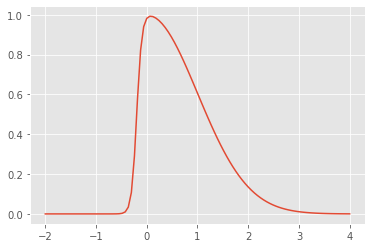

In [4]:
x = np.linspace(-2, 4, 100)
y = np.exp( - x ** 2 / 2) * sigmoid(20*x + 4)
plt.plot(x,y)
plt.show()

In [20]:
z = 0
def grad_y(z):
  return -z * np.exp(-z ** 2 /2)*sigmoid(20 * z + 4) + \
        20 * np.exp(-z ** 2 / 2)*sigmoid(20 * z + 4) * (1 - sigmoid(20*z + 4))

for i in range(1000):
  z += 0.01*grad_y(z)
  if abs(grad_y(z)) < 1e-6:
    print(f"epoch:{i}")
    print(f"mode:{z}")
    break

epoch:457
mode:0.0774791888321522


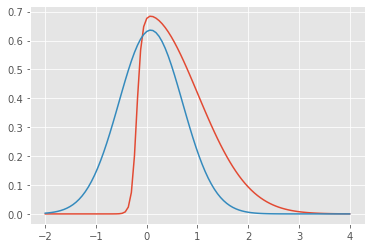

In [22]:
A = 1 + 400 * sigmoid(-(20*z +4)) * (1 - sigmoid(-(20 * z + 4)))

def gauss(x):
  return np.sqrt( A / (2 * np.pi)) * np.exp( - A/2 * (x - z)**2)

x = np.linspace(-2, 4, 100)
y1 = np.exp(- x ** 2 / 2)*sigmoid(20*x + 4) / integrate.quad(integration, -2, 4)[0]
y2 = gauss(x)
plt.plot(x, y1)
plt.plot(x, y2)  #近似式
plt.show()

### カーネル関数

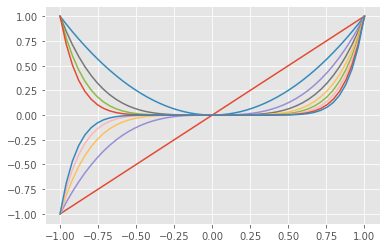

In [23]:
m = 10
def phi_poly(x):
  return x ** np.arange(1,m)

X = np.linspace(-1,1)
Y = np.array([phi_poly(x) for x in X]) #(50, m)
plt.ylim(-1.1, 1.1)
for i in range(m-1):
  plt.plot(X,Y.T[i])

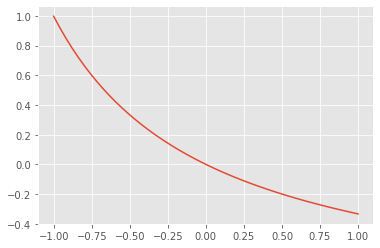

In [25]:
def k_poly(x_, x):
  return phi_poly(x_)@phi_poly(x)

plt.figure(figsize=(6,4))
x_ = -0.5
X = np.linspace(-1,1)
Y = list(map(lambda x: k_poly(x_, x), X))
plt.plot(X,Y)

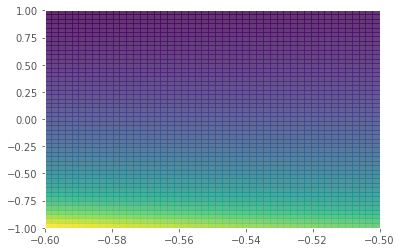

In [28]:
x, y = np.meshgrid(np.linspace(-0.6,-0.5),np.linspace(-1,1))
Z = np.vectorize(k_poly)(x,y)
plt.figure(figsize=(6,4))
plt.pcolor(x,y,Z,alpha=0.8)
plt.show()

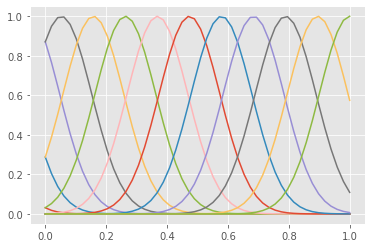

In [29]:
m = 20
def phi_gauss(x):
  h = 0.1
  return np.exp(-(x - np.linspace(-1,1,m)) ** 2/(2*h ** 2))

X = np.linspace(0,1)
Y = np.array([phi_gauss(x) for x in X]) #(50,m)
for i in range(m):
  plt.plot(X, Y.T[i])

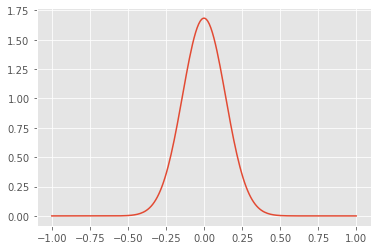

In [30]:
def k_gauss(x_, x):
  return phi_gauss(x_)@phi_gauss(x)

x_ = 0
X = np.linspace(-1,1,200)
Y = list(map(lambda x: k_gauss(x_, x), X))
plt.plot(X,Y)

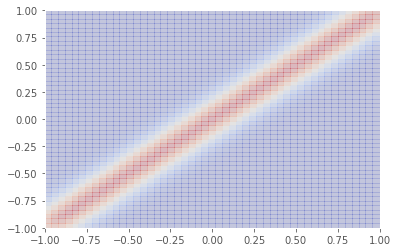

In [36]:
import matplotlib.cm as cm
x, y = np.meshgrid(np.linspace(-1,1), np.linspace(-1,1))
Z = np.vectorize(k_gauss)(x,y)
plt.figure(figsize=(6,4))
plt.pcolor(x,y,Z,alpha=0.2, cmap=cm.coolwarm)
plt.show()

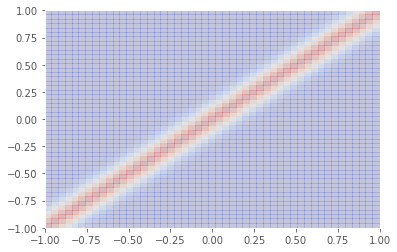

In [38]:
def gauss_kernel(x_, x):
  h = 0.1
  return np.exp( - np.abs(x_ - x) ** 2 /(2*h**2))

x, y = np.meshgrid(np.linspace(-1,1), np.linspace(-1,1))
Z = np.vectorize(gauss_kernel)(x,y)
plt.figure(figsize=(6,4))
plt.pcolor(x,y,Z,alpha=0.2, cmap=cm.coolwarm)
plt.show()

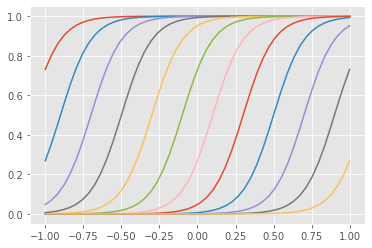

In [39]:
m = 12
def phi_sig(x):
  return 1/(1+np.exp(- 10 * (x - np.linspace(-1.1, 1.1,m))))

X = np.linspace(-1,1)
Y = np.array([phi_sig(x) for x in X])
for i in range(m):
  plt.plot(X, Y.T[i])

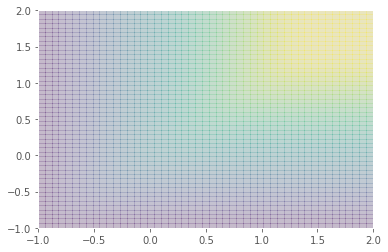

In [40]:
def k_sig(x_, x):
  return phi_sig(x_)@phi_sig(x)

x, y = np.meshgrid(np.linspace(-1,2), np.linspace(-1, 2))
Z = np.vectorize(k_sig)(x,y)
plt.figure(figsize=(6,4))
plt.pcolor(x, y, Z, alpha = 0.2)
 
plt.show()